### FIR (Finite Impulse Response)

Es una convolusión del dominio digital

$ y_{avg}[s] = \frac15\biggl[x[1]+x[2]+x[3]+x[4]+x[5]\biggr] \\$

$ y_{avg}[s] = \frac15\biggl[x[n-4]+x[n-3]+x[n-2]+x[n-1]+x[n]\biggr] \\$

$ y_{avg}[s] = \frac15(\sum_{K = n-4}^n x[k])$


$y[n] = \sum_{K = 0}^{M-1}h[k]x[n-k]$

In [20]:
import numpy as np
from numpy import pi, sin, cos, convolve
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt

plots = lambda rows = 1, cols = 1, figsize = (20, 10): plt.subplots(rows, cols, figsize = figsize)

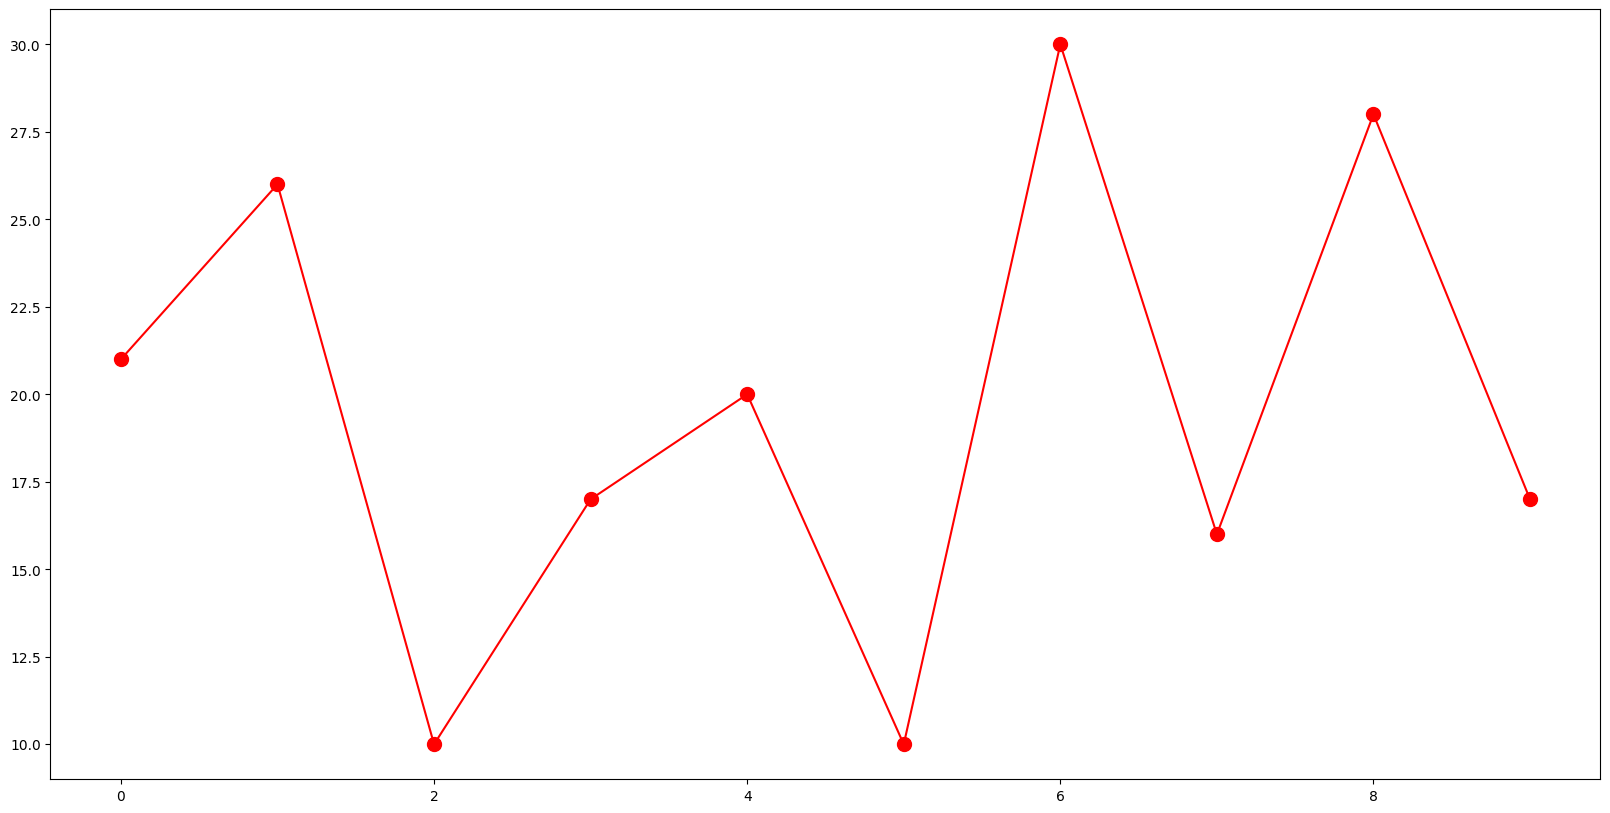

In [21]:
days = np.array([21, 26, 10, 17, 20, 10, 30, 16, 28, 17])

def plot_(ys, x = None, colours = None, markersize = 10):
    f, ax = plots(1)
    y = ys[0]
    
    if not x: x = np.arange(len(y))
    
    for i, y in enumerate(ys):
        ax.plot(x, y, colours[i] if colours else None, markersize = markersize)
        ax.plot(x, y, colours[i][0] if colours else None)
        
    plt.show()
    return f, ax

f1, ax1 = plot_([days], colours=["ro"])

In [22]:
avgs = [0]*10

for i in range(6):
    avgs[i+4] = np.mean(days[i:i+5])
    
print(avgs)

[0, 0, 0, 0, 18.8, 16.6, 17.4, 18.6, 20.8, 20.2]


In [23]:
kernel = np.array([1/5]*5)
avgs2 = convolve(days, kernel, mode = "same")
print(avgs2)

[11.4 14.8 18.8 16.6 17.4 18.6 20.8 20.2 18.2 12.2]


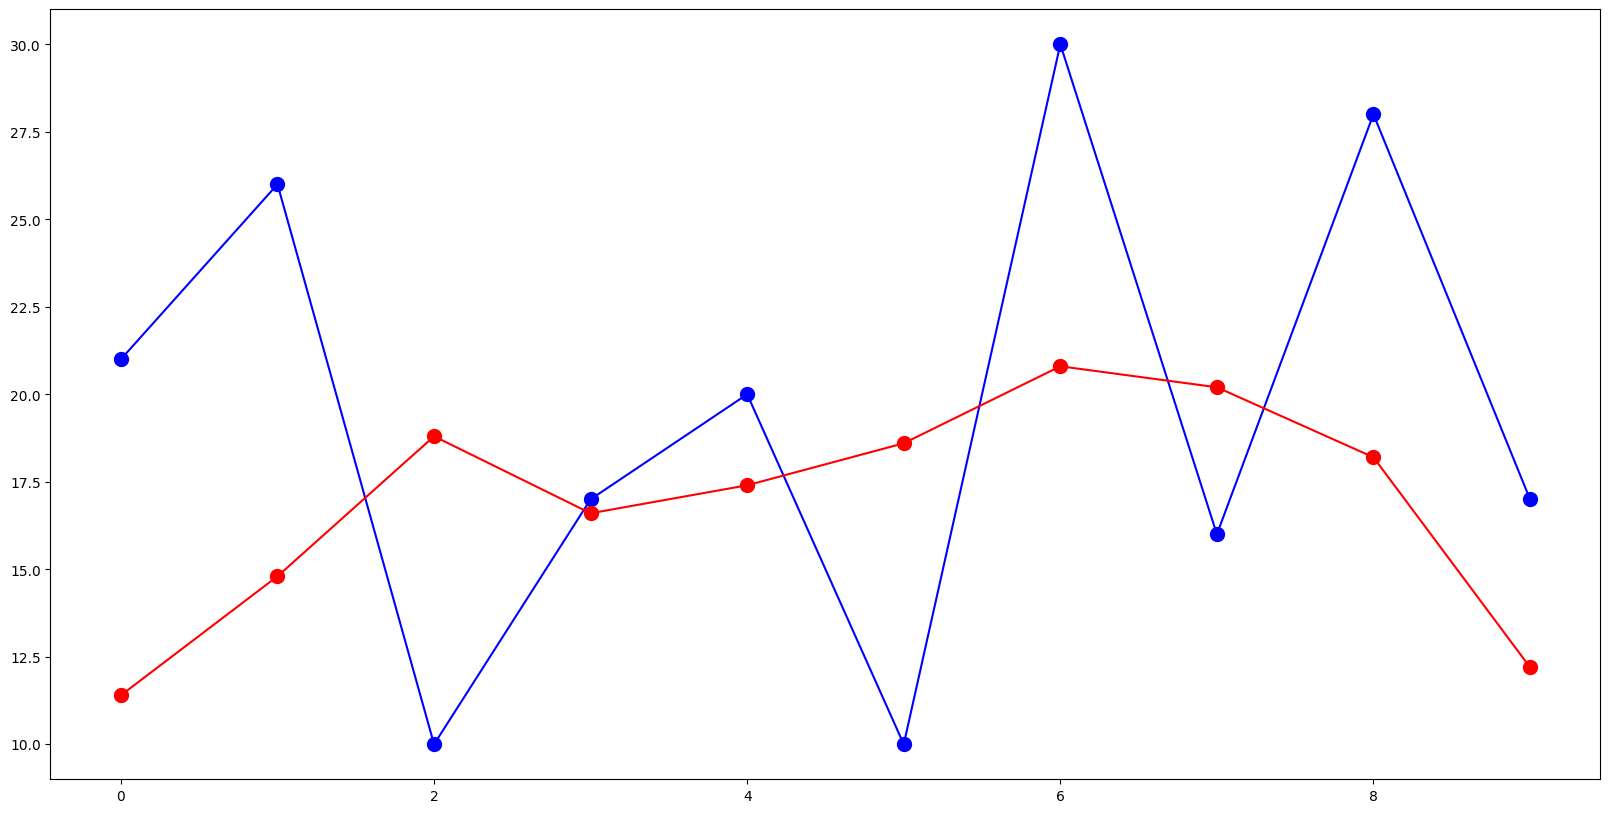

In [25]:
f2, ax2 = plot_([days, avgs2], colours=["bo", "ro"])

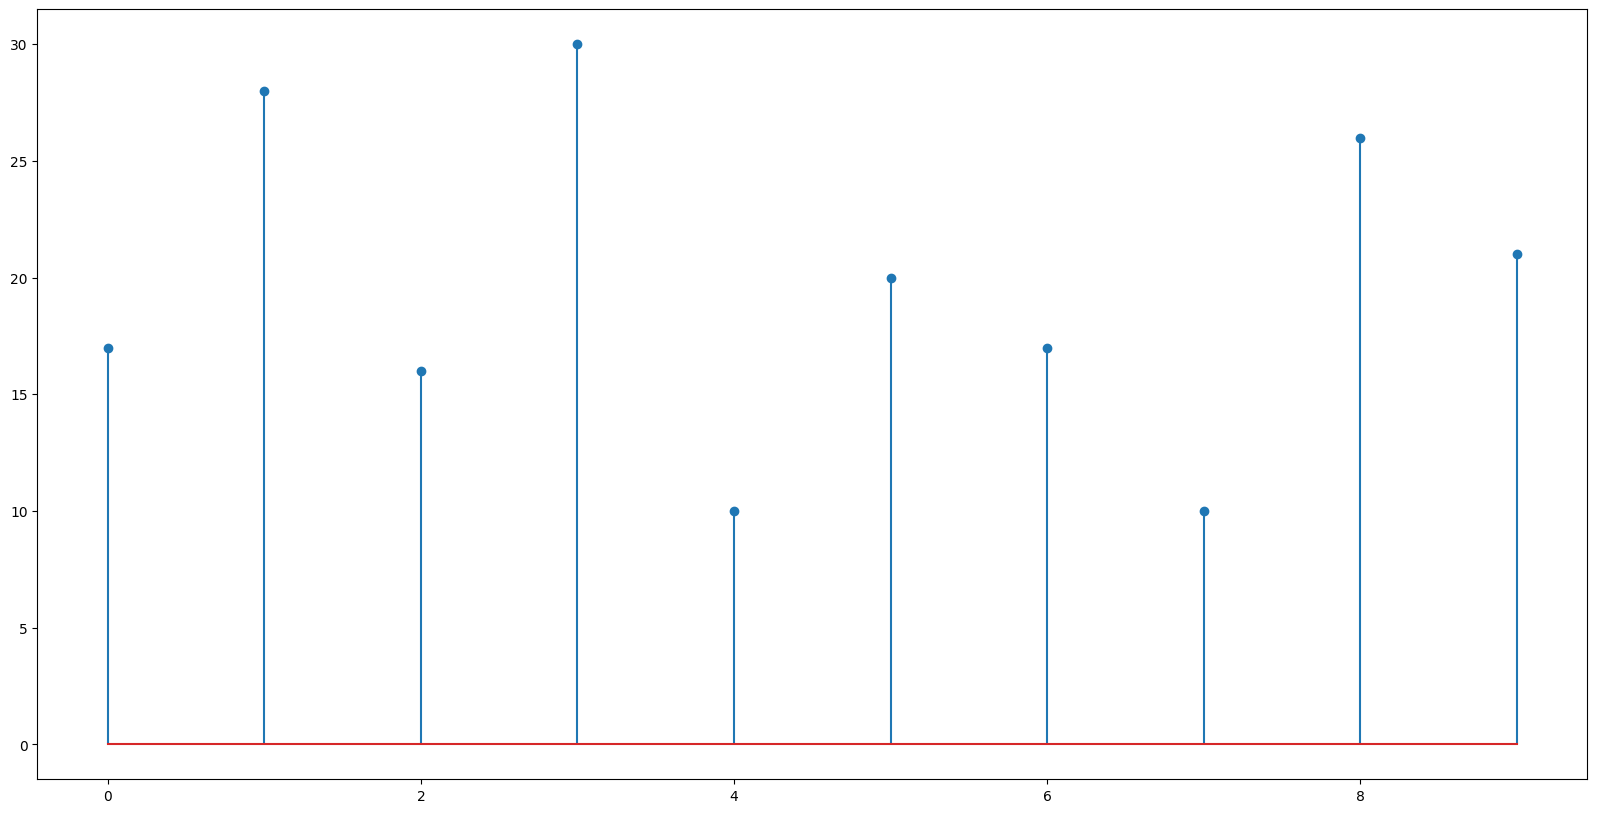

In [29]:
f3, ax3 = plots()
ax3.stem(days[::-1])
plt.show()

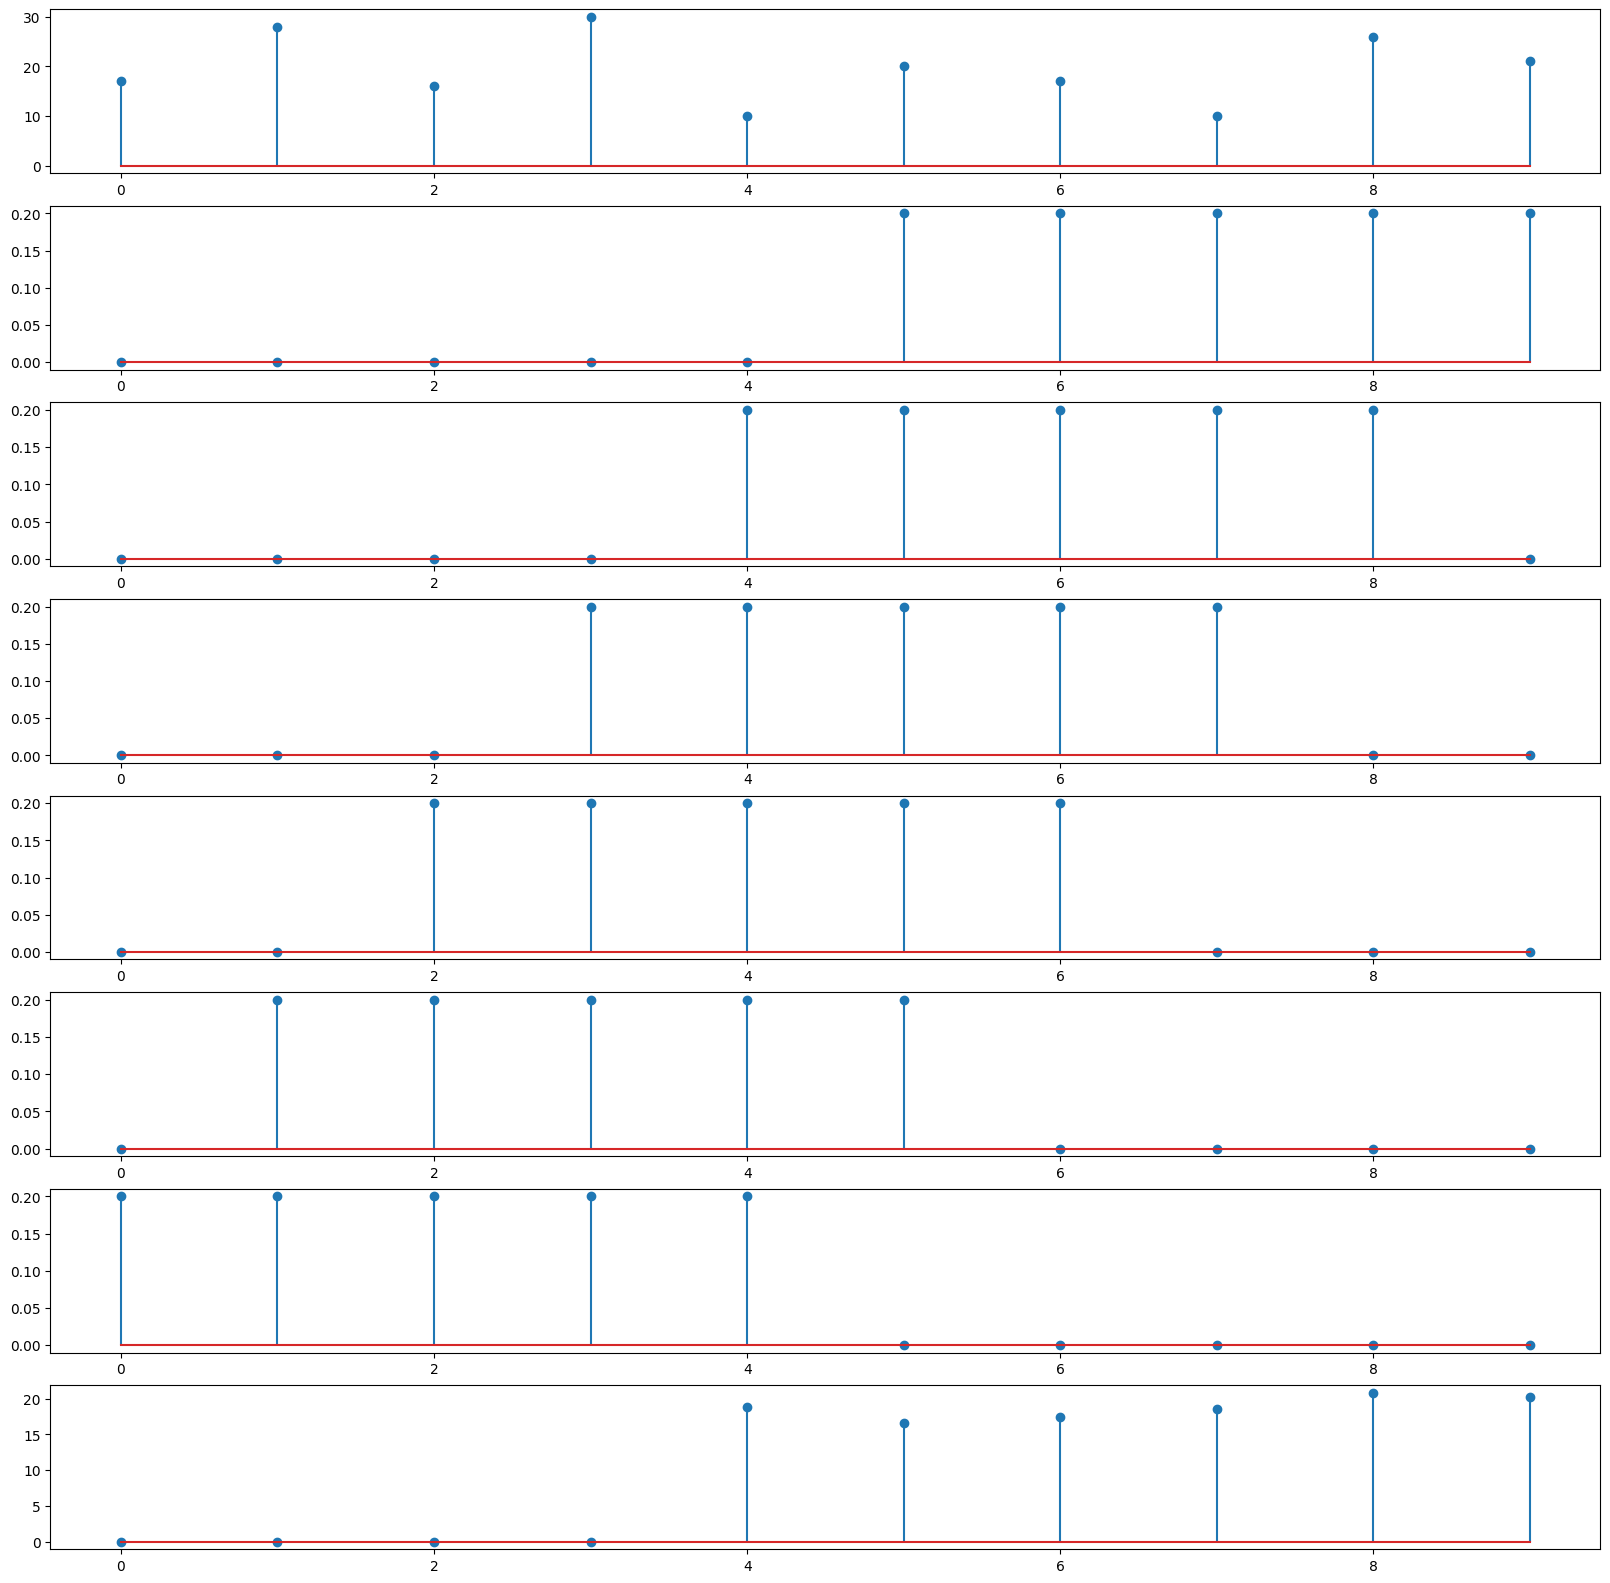

In [33]:
f4, ax4 = plots(8,1, (20,20))
ax4[0].stem(days[::-1])

for i in range(6):
    ax4[i+1].stem([0]*(5-i)+[0.2]*5 + [0]*i)
    
ax4[-1].stem(avgs)

plt.show()